In [89]:
%reload_ext autoreload
%autoreload 2
import bmxobs
from bmxobs.SingleFreqGeometry import SingleFreqGeometry
import fitsio
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j1

In [90]:
bmxobs.__path__

['/direct/astro+u/wcook/bmxobs/bmxobs']

In [91]:
D=bmxobs.BMXSingleFreqObs("pas/210802_0200")

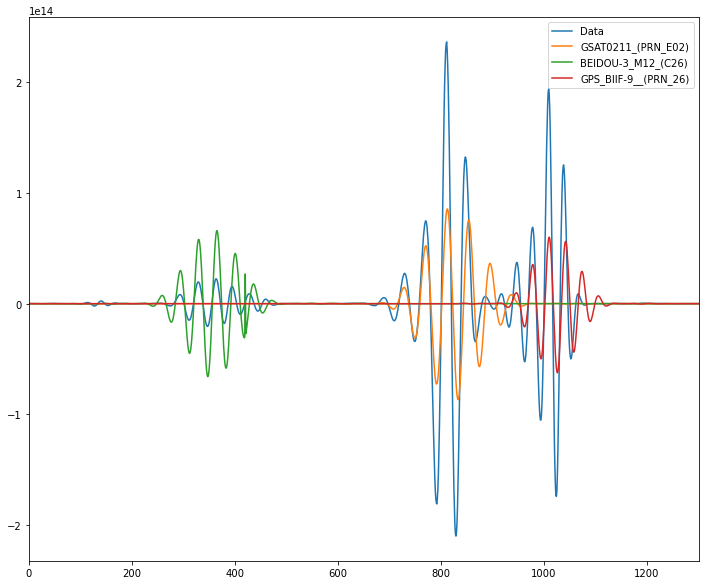

In [107]:
plt.figure(figsize=(12,10))
plt.plot(D[23].real[0:1300],label='Data')

for n,s in zip(D.sat_id,D.sat):
    if "COS" not in n:
        #dx= np.exp(-np.cos(s['alt'])**2/(2*0.05**2))
        track = np.array([np.cos(s['alt'])*np.cos(s['az']),np.cos(s['alt'])*np.sin(s['az'])]).T
        dx = SingleFreqGeometry().point_source(23,1,track).real
        if max(dx[0:1300])>0.2:
            plt.plot(dx*1e14,label=n)
        
plt.xlim(0,1300)
plt.legend()
plt.show()